**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [11]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 5.27MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [12]:
df=pd.read_csv('/content/nba_logreg.csv')
df

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  ...   

      FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0     2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1     3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2     1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3     1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4     1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  
...   ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335  1.5  79.2   0.4   0.8  1.2  2.5  0.6  0.2  0.8          0.0  
1336  1.0  79.4   0.4   1.1  1.5  2.3  0.8  0.0  1.3          1.0  
1337  1.6  64.3   1.5   2.3  3.8  0.3  0.3  0.4  0.9          0.0  
1338  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8          1.0  
1339  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9          1.0  

[1340 rows x 21 columns]

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [13]:
df.shape



(1340, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [15]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [16]:
df.head()

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]

Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [17]:
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [18]:
df.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [19]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [20]:
y=df['TARGET_5Yrs']
x=df.drop('TARGET_5Yrs',axis=1)
x=x.drop('Name',axis=1)
x.shape
y.shape

(1329,)

It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [21]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [22]:
train_x, val_x, train_y, val_y = train_test_split(x, y,test_size=0.20, random_state = 0)
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)
print("The train-to-test split ratio is:", train_x.shape[0] / val_x.shape[0])

(1063, 19)
(266, 19)
(1063,)
(266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [23]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [24]:
reg = LogisticRegression()
reg.fit(train_x,train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [55]:
y_pred = reg.predict(val_x)
print("Accuracy :",accuracy_score(val_y, y_pred))
print("F1 Score :",f1_score(val_y, y_pred))
print("Precision :",precision_score(val_y, y_pred))
print("Recall:",recall_score(val_y, y_pred))



Accuracy : 0.7105263157894737
F1 Score : 0.7806267806267806
Precision : 0.7248677248677249
Recall: 0.845679012345679


Accuracy: 0.7105263157894737
F1 Score: 0.7806267806267806
Precision: 0.7248677248677249
Recall: 0.845679012345679


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [56]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [57]:
svc = SVC()
svc.fit(train_x,train_y)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [58]:
y_pred1 = svc.predict(val_x)
print("Accuracy :",accuracy_score(val_y, y_pred1))
print("F1 Score :",f1_score(val_y, y_pred1))
print("Precision :",precision_score(val_y, y_pred1))
print("Recall:",recall_score(val_y, y_pred1))

Accuracy : 0.7030075187969925
F1 Score : 0.7799442896935933
Precision : 0.7106598984771574
Recall: 0.8641975308641975


### MULTICLASS CLASSIFICATION

In [31]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 62.1MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [59]:
swb=pd.read_csv('/content/social_well_being.csv')
swb

User_ID  Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1   25      Female  Instagram                         120   
1          2   30        Male    Twitter                          90   
2          3   22  Non-binary   Facebook                          60   
3          4   28      Female  Instagram                         200   
4          5   33        Male   LinkedIn                          45   
..       ...  ...         ...        ...                         ...   
919      996   33  Non-binary    Twitter                          85   
920      997   22      Female   Facebook                          70   
921      998   35        Male   Whatsapp                         110   
922      999   28  Non-binary   Telegram                          60   
923     1000   27      Female   Snapchat                         120   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0                3                      45                         10   
1                5                      20                         25   
2                2                      15                          5   
3                8                     100                         30   
4                1                       5                          2   
..             ...                     ...                        ...   
919              4                      35                         18   
920              1                      14                          6   
921              3                      50                         25   
922              2                      18                          8   
923              4                      40                         18   

     Messages_Sent_Per_Day Dominant_Emotion  
0                       12        Happiness  
1                       30            Anger  
2                       20          Neutral  
3                       50          Anxiety  
4                       10          Boredom  
..                     ...              ...  
919                     18          Boredom  
920                     10          Neutral  
921                     25        Happiness  
922                     18            Anger  
923                     22          Neutral  

[924 rows x 10 columns]

**Always analyse the data.**

In [61]:
swb.head()
swb.columns


Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [62]:
swb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [63]:
swb.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [64]:
swb.shape

(924, 10)

Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [65]:
swb['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [66]:
swb['Gender'].unique()

array(['Female', 'Male', 'Non-binary'], dtype=object)

In [67]:
swb['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [68]:
from sklearn.preprocessing import OneHotEncoder

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [69]:
ohe = OneHotEncoder(sparse_output=False)
gender_encoded = ohe.fit_transform(swb[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))
swb = swb.drop('Gender', axis=1)
swb = pd.concat([swb, gender_df], axis=1)
swb.head()

User_ID  Age   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25  Instagram                         120              3   
1        2   30    Twitter                          90              5   
2        3   22   Facebook                          60              2   
3        4   28  Instagram                         200              8   
4        5   33   LinkedIn                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  Gender_Female  Gender_Male  Gender_Non-binary  
0        Happiness            1.0          0.0                0.0  
1            Anger            0.0          1.0                0.0  
2          Neutral            0.0          0.0                1.0  
3          Anxiety            1.0          0.0                0.0  
4          Boredom            0.0          1.0                0.0

**Repeat the drill for the column 'Platform'.**

In [70]:
ohe = OneHotEncoder(sparse_output=False)
platform_encoded = ohe.fit_transform(swb[['Platform']])
platform_df = pd.DataFrame(platform_encoded, columns=ohe.get_feature_names_out(['Platform']))
swb = swb.drop('Platform', axis=1)
swb = pd.concat([swb, platform_df], axis=1)
swb.head()

User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25                         120              3   
1        2   30                          90              5   
2        3   22                          60              2   
3        4   28                         200              8   
4        5   33                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  Gender_Female  Gender_Male  Gender_Non-binary  \
0        Happiness            1.0          0.0                0.0   
1            Anger            0.0          1.0                0.0   
2          Neutral            0.0          0.0                1.0   
3          Anxiety            1.0          0.0                0.0   
4          Boredom            0.0          1.0                0.0   

   Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0                0.0                 1.0                0.0   
1                0.0                 0.0                0.0   
2                1.0                 0.0                0.0   
3                0.0                 1.0                0.0   
4                0.0                 0.0                1.0   

   Platform_Snapchat  Platform_Telegram  Platform_Twitter  Platform_Whatsapp  
0                0.0                0.0               0.0                0.0  
1                0.0                0.0               1.0                0.0  
2                0.0                0.0               0.0                0.0  
3                0.0                0.0               0.0                0.0  
4                0.0                0.0               0.0                0.0

Last categorical feature is our label column.

**Import the module used for label encoding.**

In [71]:
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [72]:
le = LabelEncoder()
swb['Dominant_Emotion'] = le.fit_transform(swb['Dominant_Emotion'])
swb.head()

User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25                         120              3   
1        2   30                          90              5   
2        3   22                          60              2   
3        4   28                         200              8   
4        5   33                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

   Dominant_Emotion  Gender_Female  Gender_Male  Gender_Non-binary  \
0                 3            1.0          0.0                0.0   
1                 0            0.0          1.0                0.0   
2                 4            0.0          0.0                1.0   
3                 1            1.0          0.0                0.0   
4                 2            0.0          1.0                0.0   

   Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0                0.0                 1.0                0.0   
1                0.0                 0.0                0.0   
2                1.0                 0.0                0.0   
3                0.0                 1.0                0.0   
4                0.0                 0.0                1.0   

   Platform_Snapchat  Platform_Telegram  Platform_Twitter  Platform_Whatsapp  
0                0.0                0.0               0.0                0.0  
1                0.0                0.0               1.0                0.0  
2                0.0                0.0               0.0                0.0  
3                0.0                0.0               0.0                0.0  
4                0.0                0.0               0.0                0.0

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [73]:
Y=swb['Dominant_Emotion']
X=swb.drop('Dominant_Emotion',axis=1)
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.20, random_state=0)
print(train_X.shape)
print(val_X.shape)
print(train_Y.shape)
print(val_Y.shape)

(739, 17)
(185, 17)
(739,)
(185,)


**Import the module used for training a KNN model.**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [75]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [77]:
y_pred = knn.predict(val_X)
print(y_pred)

[0 2 0 3 0 2 1 0 2 3 4 3 0 4 3 0 4 3 0 5 1 3 1 4 3 1 0 4 1 2 5 3 0 0 2 4 2
 5 2 2 0 0 1 0 4 3 3 2 2 1 0 3 3 2 3 1 2 3 2 1 1 0 2 0 4 0 3 2 4 3 1 0 0 0
 2 3 4 4 3 4 5 2 2 1 3 4 4 5 0 1 3 4 2 2 3 3 2 0 2 3 3 2 0 2 3 5 4 4 2 3 3
 2 3 4 3 2 3 3 0 1 2 4 3 0 0 2 5 0 3 2 3 0 3 4 5 3 3 3 5 3 3 0 2 5 0 5 3 5
 3 0 2 3 0 3 4 0 3 0 0 2 0 4 2 2 5 2 4 5 4 4 3 3 4 0 0 0 3 4 0 0 1 2 2 3 4]


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [78]:
y_pred_original = le.inverse_transform(y_pred)
y_pred_original

array(['Anger', 'Boredom', 'Anger', 'Happiness', 'Anger', 'Boredom',
       'Anxiety', 'Anger', 'Boredom', 'Happiness', 'Neutral', 'Happiness',
       'Anger', 'Neutral', 'Happiness', 'Anger', 'Neutral', 'Happiness',
       'Anger', 'Sadness', 'Anxiety', 'Happiness', 'Anxiety', 'Neutral',
       'Happiness', 'Anxiety', 'Anger', 'Neutral', 'Anxiety', 'Boredom',
       'Sadness', 'Happiness', 'Anger', 'Anger', 'Boredom', 'Neutral',
       'Boredom', 'Sadness', 'Boredom', 'Boredom', 'Anger', 'Anger',
       'Anxiety', 'Anger', 'Neutral', 'Happiness', 'Happiness', 'Boredom',
       'Boredom', 'Anxiety', 'Anger', 'Happiness', 'Happiness', 'Boredom',
       'Happiness', 'Anxiety', 'Boredom', 'Happiness', 'Boredom',
       'Anxiety', 'Anxiety', 'Anger', 'Boredom', 'Anger', 'Neutral',
       'Anger', 'Happiness', 'Boredom', 'Neutral', 'Happiness', 'Anxiety',
       'Anger', 'Anger', 'Anger', 'Boredom', 'Happiness', 'Neutral',
       'Neutral', 'Happiness', 'Neutral', 'Sadness', 'Boredom', 'Bor

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [79]:
val_Y_original = le.inverse_transform(val_Y)

In [80]:
print("Accuracy :",accuracy_score(val_Y_original, y_pred_original))
print("F1 Score :",f1_score(val_Y_original, y_pred_original, average='weighted'))
print("Precision :",precision_score(val_Y_original, y_pred_original, average='weighted'))
print("Recall:",recall_score(val_Y_original, y_pred_original, average='weighted'))

Accuracy : 0.3891891891891892
F1 Score : 0.36132132132132133
Precision : 0.3655422575649973
Recall: 0.3891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(val_Y_original, y_pred_original))
print(classification_report(val_Y_original, y_pred_original))

[[14  1  1  2  2  9]
 [10  6  8  7  4  0]
 [ 0  3 12  0  7  0]
 [ 6  0  0 32  1  2]
 [ 7  3 11  3  8  3]
 [ 4  2  6  5  6  0]]
              precision    recall  f1-score   support

       Anger       0.34      0.48      0.40        29
     Anxiety       0.40      0.17      0.24        35
     Boredom       0.32      0.55      0.40        22
   Happiness       0.65      0.78      0.71        41
     Neutral       0.29      0.23      0.25        35
     Sadness       0.00      0.00      0.00        23

    accuracy                           0.39       185
   macro avg       0.33      0.37      0.33       185
weighted avg       0.37      0.39      0.36       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [84]:
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [85]:
gnb = GaussianNB()
gnb.fit(train_X,train_Y)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [86]:
y_pred1 = gnb.predict(val_X)
y_pred_original1 = le.inverse_transform(y_pred1)

**Finally, print the accuracy, confusion matrix and classification report.**

In [87]:
print("Accuracy :",accuracy_score(val_Y_original, y_pred_original1))
print(confusion_matrix(val_Y_original, y_pred_original1))
print(classification_report(val_Y_original, y_pred_original1))

Accuracy : 0.4702702702702703
[[27  0  2  0  0  0]
 [10  0 14  7  0  4]
 [ 2  0 20  0  0  0]
 [ 5  0  0 35  0  1]
 [ 7  0 23  2  0  3]
 [ 9  0  4  5  0  5]]
              precision    recall  f1-score   support

       Anger       0.45      0.93      0.61        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.32      0.91      0.47        22
   Happiness       0.71      0.85      0.78        41
     Neutral       0.00      0.00      0.00        35
     Sadness       0.38      0.22      0.28        23

    accuracy                           0.47       185
   macro avg       0.31      0.49      0.36       185
weighted avg       0.31      0.47      0.36       185



### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
y_pred2 = dtc.predict(val_X)
y_pred_original2 = le.inverse_transform(y_pred2)
print("Accuracy :",accuracy_score(val_Y_original, y_pred_original2))
print(confusion_matrix(val_Y_original, y_pred_original2))
print(classification_report(val_Y_original, y_pred_original2))

Accuracy : 0.9675675675675676
[[28  0  0  0  0  1]
 [ 0 34  1  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  1  0 40  0  0]
 [ 0  0  0  0 34  1]
 [ 1  0  1  0  0 21]]
              precision    recall  f1-score   support

       Anger       0.97      0.97      0.97        29
     Anxiety       0.97      0.97      0.97        35
     Boredom       0.92      1.00      0.96        22
   Happiness       1.00      0.98      0.99        41
     Neutral       1.00      0.97      0.99        35
     Sadness       0.91      0.91      0.91        23

    accuracy                           0.97       185
   macro avg       0.96      0.97      0.96       185
weighted avg       0.97      0.97      0.97       185



In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_Y)
y_pred3 = rfc.predict(val_X)
y_pred_original3 = le.inverse_transform(y_pred3)
print("Accuracy :",accuracy_score(val_Y_original, y_pred_original3))
print(confusion_matrix(val_Y_original, y_pred_original3))
print(classification_report(val_Y_original, y_pred_original3))

Accuracy : 0.9837837837837838
[[28  0  0  0  0  1]
 [ 0 34  1  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 40  1  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 23]]
              precision    recall  f1-score   support

       Anger       1.00      0.97      0.98        29
     Anxiety       1.00      0.97      0.99        35
     Boredom       0.96      1.00      0.98        22
   Happiness       1.00      0.98      0.99        41
     Neutral       0.97      1.00      0.99        35
     Sadness       0.96      1.00      0.98        23

    accuracy                           0.98       185
   macro avg       0.98      0.99      0.98       185
weighted avg       0.98      0.98      0.98       185



# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [91]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [92]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0     1     2     3     4     5     6     7     8     9     ...  4009  \
1x1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
28x24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x27   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x28   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       4010  4011  4012  4013  4014  40

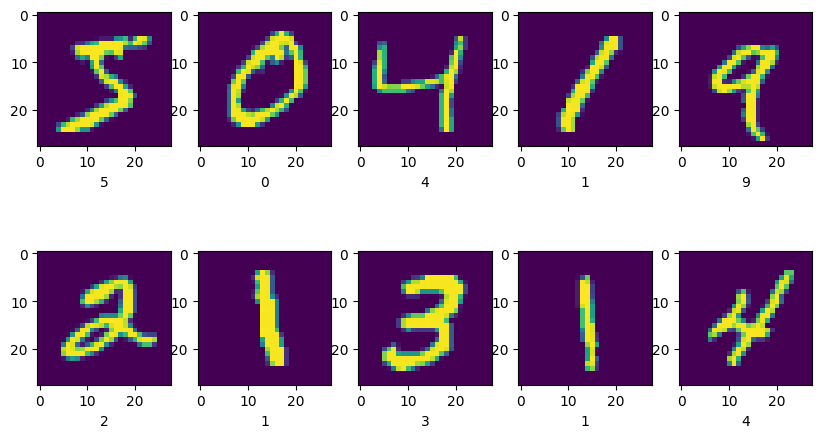

In [93]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [103]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    pass

  def softmax(self, Z):
    # Implement the softmax activation function
    pass

  def forward_propagation(self, X):
    # Implement the forward_propagation function as part of your assignment
    # Placeholder return to prevent TypeError
    return np.zeros((self.output_size, X.shape[1])), {}

  def one_hot_encode(self, y):
    # Implement one hot encoding
    pass

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    pass

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"db{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    #implement train
    pass

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions

In [104]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

In [105]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 8.603545179420665 %


3


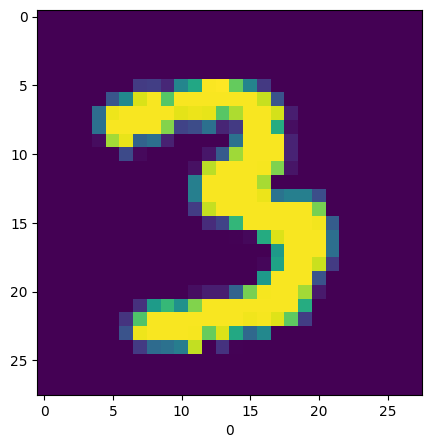

In [106]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
